### EDA

In [11]:
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from PIL import Image
from collections import Counter
from natsort import natsorted
import random

In [15]:
# Paths
image_dir = "../data/raw_data"
label_path = "../data/imagelabels.mat"
split_path = "../data/setid.mat"

In [16]:
image_files = natsorted(os.listdir(image_dir))

In [17]:
labels = loadmat(label_path)["labels"][0]
labels = [l - 1 for l in labels]

In [18]:
splits = loadmat(split_path)
train_ids = [i - 1 for i in splits['trnid'][0]]
val_ids = [i - 1 for i in splits['valid'][0]]
test_ids = [i - 1 for i in splits['tstid'][0]]


In [19]:
print(f"Train size: {len(train_ids)}")
print(f"Val size: {len(val_ids)}")
print(f"Test size: {len(test_ids)}")


Train size: 1020
Val size: 1020
Test size: 6149


In [22]:
# Count class distribution
def label_counts(ids):
    return Counter([labels[i] for i in ids])

train_counts = label_counts(train_ids)
val_counts = label_counts(val_ids)
test_counts = label_counts(test_ids)

print(len(train_counts))
print(len(val_counts))
print(len(test_counts))

102
102
102


/tmp/ipykernel_1274977/3520613876.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_classes = random.sample(set(labels), 5)


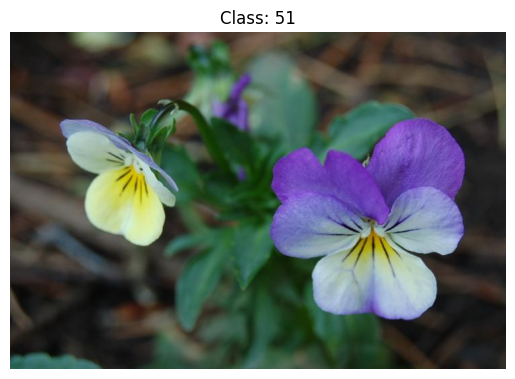

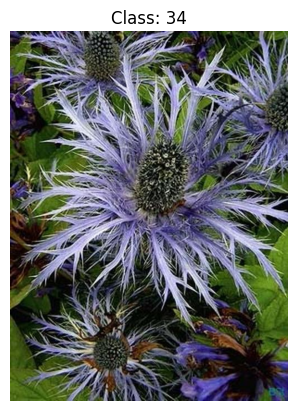

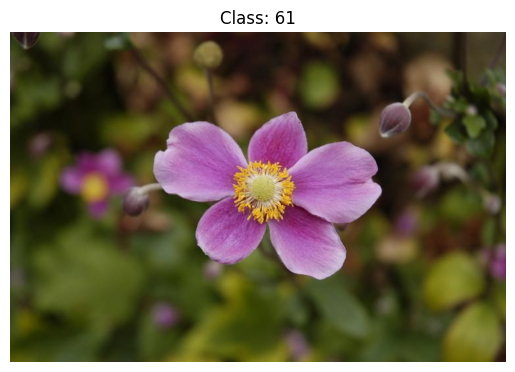

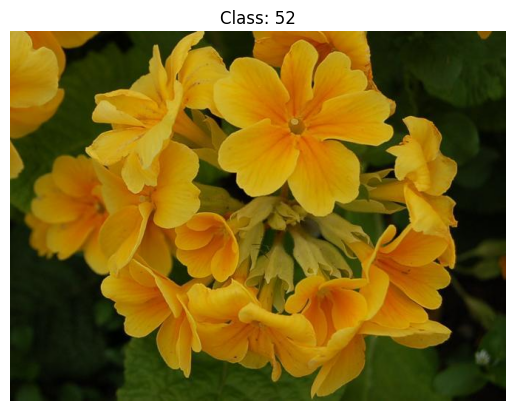

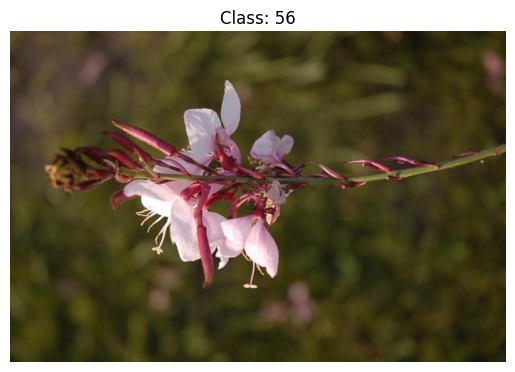

In [24]:
sample_classes = random.sample(set(labels), 5)

for c in sample_classes:
    idx = labels.index(c)
    img = Image.open(os.path.join(image_dir, image_files[idx]))
    plt.imshow(img)
    plt.title(f"Class: {c}")
    plt.axis("off")
    plt.show()